In [57]:
# Package Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the data from 'FAALLO ARUURIN.csv' into a pandas DataFrame
df = pd.read_csv('./FAALLO ARUURIN.csv')

In [59]:
# Display the first 5 rows of the DataFrame and he last 5 rows of the DataFrame
df.head(5) , df.tail(5)

(   Unnamed: 0                                             Faallo Sun ah  \
 0         NaN        Racfaan aa qadan ku laha duqa sharbaha weyn      1   
 1         NaN                               qiyaamo Xagu galayaa      0   
 2         NaN  Dumarku waa sida beedka oo kle daryeel gaar ah...      0   
 3         NaN                     War howlahan shaqadiina ma aha      1   
 4         NaN                           Cadaaladu way guulaysate      0   
 
    Fuxshi Goodis  Caay  Sinji-nacayb  Aan sun aheyn  
 0     0.0      0   1.0           1.0            0.0  
 1     0.0      0   0.0           0.0            0.0  
 2     0.0      0   0.0           0.0            1.0  
 3     0.0      0   0.0           0.0            0.0  
 4     0.0      0   0.0           0.0            1.0  ,
       Unnamed: 0                                             Faallo Sun ah  \
 7778         NaN                         Dr waa runted anaa ogaday.      0   
 7779         NaN  Dhaqan xumadii baa su,aalo laga dh

In [60]:
# Display the column names of the DataFrame
df.columns

Index(['Unnamed: 0', 'Faallo', 'Sun ah', 'Fuxshi', 'Goodis', 'Caay',
       'Sinji-nacayb', 'Aan sun aheyn'],
      dtype='object')

In [61]:
# Display the shape of the DataFrame
df.shape

(7783, 8)

In [62]:
# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop(columns=['Unnamed: 0'])

In [63]:
df.shape

(7783, 7)

In [64]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Faallo         7780 non-null   object 
 1   Sun ah         7725 non-null   object 
 2   Fuxshi         7710 non-null   float64
 3   Goodis         7710 non-null   object 
 4   Caay           7701 non-null   float64
 5   Sinji-nacayb   7705 non-null   float64
 6   Aan sun aheyn  7681 non-null   float64
dtypes: float64(4), object(3)
memory usage: 425.8+ KB


In [65]:
# Group the DataFrame by the 'Sun ah' column and get descriptive statistics for each group
df.groupby('Sun ah').describe()

Fuxshi                                                 Caay  \
               count      mean       std  min  25%  50%  75%  max   count   
Sun ah                                                                      
0             3522.0  0.002839  0.053217  0.0  0.0  0.0  0.0  1.0  3518.0   
1             4185.0  0.077180  0.297404  0.0  0.0  0.0  0.0  9.0  4179.0   
`                1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0     1.0   
aan sun ahyn     0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN     0.0   

                        ... Sinji-nacayb      Aan sun aheyn            \
                  mean  ...          75%  max         count      mean   
Sun ah                  ...                                             
0             0.016771  ...          0.0  1.0        3510.0  0.894587   
1             0.441254  ...          0.0  1.0        4166.0  0.016563   
`             0.000000  ...          0.0  0.0           1.0  0.000000   
aan sun ahyn       NaN  ...          NaN  NaN           0.0       NaN   

                                                  
                   std  min  25%  50%  75%   max  
Sun ah                                            
0             0.354508  0.0  1.0  1.0  1.0  11.0  
1             0.194681  0.0  0.0  0.0  0.0  10.0  
`                  NaN  0.0  0.0  0.0  0.0   0.0  
aan sun ahyn       NaN  NaN  NaN  NaN  NaN   NaN  

[4 rows x 32 columns]

In [66]:
# Get value counts for each specified column and store in a list
[
    df['Sun ah'].value_counts(), 
    df['Fuxshi'].value_counts(), 
    df['Goodis'].value_counts(), 
    df['Caay'].value_counts(),
    df['Sinji-nacayb'].value_counts(),
    df['Aan sun aheyn'].value_counts()
] 

[Sun ah
 1               4193
 0               3529
 aan sun ahyn       2
 `                  1
 Name: count, dtype: int64,
 Fuxshi
 0.0    7385
 1.0     324
 9.0       1
 Name: count, dtype: int64,
 Goodis
 0    7434
 1     274
         1
 -       1
 Name: count, dtype: int64,
 Caay
 0.0     5815
 1.0     1884
 10.0       2
 Name: count, dtype: int64,
 Sinji-nacayb
 0.0    7227
 1.0     478
 Name: count, dtype: int64,
 Aan sun aheyn
 0.0     4488
 1.0     3191
 11.0       1
 10.0       1
 Name: count, dtype: int64]

In [73]:
# List of Somali stop words
somali_stop_words  = [
    'waa', 'waana','balse','iyadoo','ma', 'waan','laga','isagoo','la', 'ah', 'oo', 'ee', 'waxey','waxay',
    'lasoo' , 'ugu', 'waxa','uu','eeyga','loo', 'sii','Haddaba', 'haddii','loona','hadda','inkastoo',
     'kula','waxuu', 'uga',  'soo', 'si', 'ku', 'kuu',  'kasoo', 'eey', 'iyo', 'aad', 'baan', 'u', 
    'leh', 'beey', 'ahna','yahay','mana','waxaana','sida','kaddib','dib','maxay','inay','inaan',
     'inaana','inaanay','inaaney','lakin',  'kale','ka', 'inuu', 'in','hadana', 'dhan','ayuu','aaney',
      'ayee',  'ayaa','kala','kule', 'sidoo', 'kalena','aysan', 'laakiin','hor','ayay','kuwaas',
       'wali','isku','halkaasoo','ay','kuna','aan','isla','markaana','ahaanba','iyadoo','inta',
        'aysan','kamid', 'kaasoo','wax' ,'kala','Guud','intaas','Muxuu','awgeed','miyuu','inuu',
        'iska','kamid','kaliya','markiiba','Kuwo','Kuwa','intaysan','wuxuuna','xitaa','kuwee',
         'kuwaas','kuwa','kuwaas','kuwii','intii','intaa','dabadeed','yihiin','gabi','iskaba', 
         'ahaanba','awgii','isugu','kuwaasoo','kaddibna', 'waxba','usoo','lagama','wuu',
        'lamana','lasoo','naga','loogu','aadka','kii','kana','idiin','inoo','aynu','yaa','iney',
        'waxaan','waxaa','waliba','kasta','ilaa','ahayd','waxana','ina','inan','waxaas','maxaad',
         'lagu','wixii','uusan','walba','ahayn','wuxuu','inaga','kuwo','ila','wada','una','xataa',
         'walina','way','inaad','kama','ahaa','lama','kaga','kaas','nagu','aay','ha','aaynu',
         'uma','ayaad','kusoo','aha','sidee','iskugu','kalana','kamida','hore','inkasta','iwm',
          'waxayna','hase','maxaan','ayaana','kahor','kadib','kaa','aheyn' ,'kugu','waxaanu',
           'kan', 'ayey' ,'kaasi',"noo",'iga','iigu','ayayna','inuusan','baannu','looga','idin' ,
           'kadibna','ahaatee','ama','waaye','nooga','isu','kaleba','maxaa','islamarkaana','lagala', 
            'soo','wuxi','kastaba','naloo','walbo','kuma','is','mise','igu','lakiin','baa','yaan'
            ,'nagala','amase','haa','waxaad','idiinku','maxad','kasii','baad','waxan','sidii',
            'kuwaasi','muxuu','iskeed','ula','nugul','horta','intiisa','yeeshee','kusii','uugu','sideen'
            ,'unbuu','looguna','inaanu','markuu','bal',"mooyee",'hadduu','midba','wuxu','waayo','iima','iimaanu',
            'waxsoo','caadiga','innoo','aanad','lala','amma','waad','kuugu','hadii','markaa','hasii','lee','anaan'
            ,'ii','tankale','weeyaan','waase','isoo','haatan','haddana','waxaanay','hadaan','ayna','uuna','inaysan'
                ,'aya','laguna','laguma','ta','inaa','lkn','haku','hasoo','waayahay','kulasoo','laakin','sidaas', 'aa'
]

In [74]:
somali_stop_words

['waa',
 'waana',
 'balse',
 'iyadoo',
 'ma',
 'waan',
 'laga',
 'isagoo',
 'la',
 'ah',
 'oo',
 'ee',
 'waxey',
 'waxay',
 'lasoo',
 'ugu',
 'waxa',
 'uu',
 'eeyga',
 'loo',
 'sii',
 'Haddaba',
 'haddii',
 'loona',
 'hadda',
 'inkastoo',
 'kula',
 'waxuu',
 'uga',
 'soo',
 'si',
 'ku',
 'kuu',
 'kasoo',
 'eey',
 'iyo',
 'aad',
 'baan',
 'u',
 'leh',
 'beey',
 'ahna',
 'yahay',
 'mana',
 'waxaana',
 'sida',
 'kaddib',
 'dib',
 'maxay',
 'inay',
 'inaan',
 'inaana',
 'inaanay',
 'inaaney',
 'lakin',
 'kale',
 'ka',
 'inuu',
 'in',
 'hadana',
 'dhan',
 'ayuu',
 'aaney',
 'ayee',
 'ayaa',
 'kala',
 'kule',
 'sidoo',
 'kalena',
 'aysan',
 'laakiin',
 'hor',
 'ayay',
 'kuwaas',
 'wali',
 'isku',
 'halkaasoo',
 'ay',
 'kuna',
 'aan',
 'isla',
 'markaana',
 'ahaanba',
 'iyadoo',
 'inta',
 'aysan',
 'kamid',
 'kaasoo',
 'wax',
 'kala',
 'Guud',
 'intaas',
 'Muxuu',
 'awgeed',
 'miyuu',
 'inuu',
 'iska',
 'kamid',
 'kaliya',
 'markiiba',
 'Kuwo',
 'Kuwa',
 'intaysan',
 'wuxuuna',
 'xitaa',
 'ku

In [72]:
df['Faallo']

0                Racfaan aa qadan laha duqa sharbaha weyn
1                                    qiyaamo Xagu galayaa
2       Dumarku beedka kle daryeel gaar bay mudan gaba...
3                                 War howlahan shaqadiina
4                                    Cadaaladu guulaysate
                              ...                        
7778                               Dr runted anaa ogaday.
7779             Dhaqan xumadii su,aalo dhigey akhirayaa.
7780                      Bala jawaabte wayba saxantahay.
7781                         Hadanba hestaa qubura tahay.
7782                       Walal adigu dagtar miya tahay?
Name: Faallo, Length: 7783, dtype: object

In [75]:
# Fill NaN values in 'Faallo' column with empty string
df['Faallo'] =  df['Faallo'].fillna('')
# Function to remove stop words
def remove_stop_words(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in somali_stop_words])
    else:
        return text

# Apply the function to the comments column
df['Faallo'] = df['Faallo'].apply(remove_stop_words)

print(df.head())

                                              Faallo Sun ah  Fuxshi Goodis  \
0              Racfaan qadan laha duqa sharbaha weyn      1     0.0      0   
1                               qiyaamo Xagu galayaa      0     0.0      0   
2  Dumarku beedka kle daryeel gaar bay mudan gaba...      0     0.0      0   
3                            War howlahan shaqadiina      1     0.0      0   
4                               Cadaaladu guulaysate      0     0.0      0   

   Caay  Sinji-nacayb  Aan sun aheyn  
0   1.0           1.0            0.0  
1   0.0           0.0            0.0  
2   0.0           0.0            1.0  
3   0.0           0.0            0.0  
4   0.0           0.0            1.0  


In [77]:
numeric_columns = df.drop(columns = ['Faallo']).columns
print(numeric_columns)

Index(['Sun ah', 'Fuxshi', 'Goodis', 'Caay', 'Sinji-nacayb', 'Aan sun aheyn'], dtype='object')


In [78]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

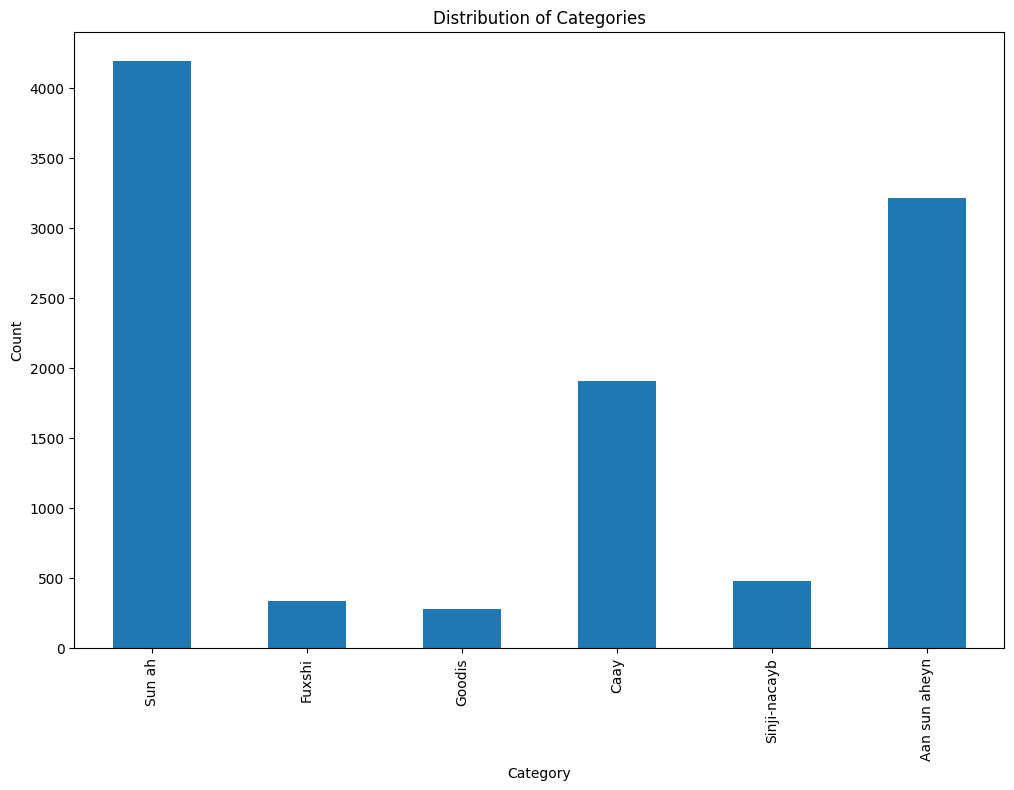

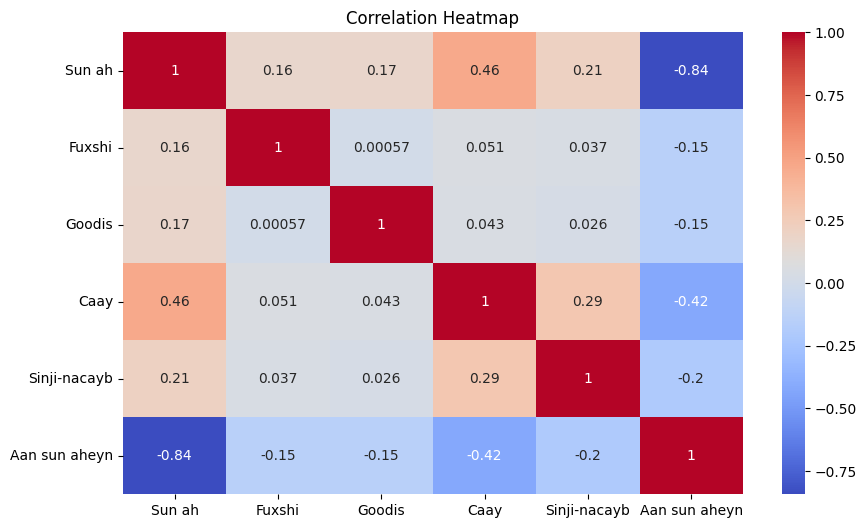

In [79]:
# Plot the distribution of each category
plt.figure(figsize=(12, 8))
df.drop(columns=['Faallo']).sum().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()